In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018.db',
                                     mask='/home/eli/Documents/AffVids_20180104/nifti/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(affvids_db.all(_limit=10), mask='/home/eli/Documents/AffVids_20180104/nifti/wholebrain.nii.gz', num_factors=25, embedding_dim=2)

04/26/2018 13:16:39 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-23_task-AffVids_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain.nii.gz (zscore=False)


/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


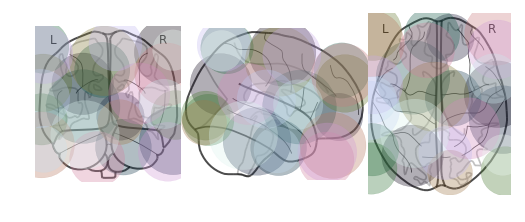

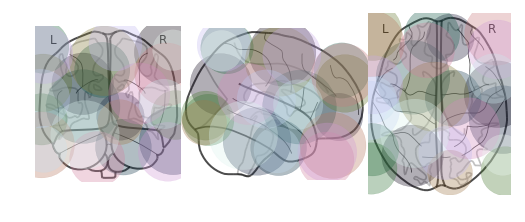

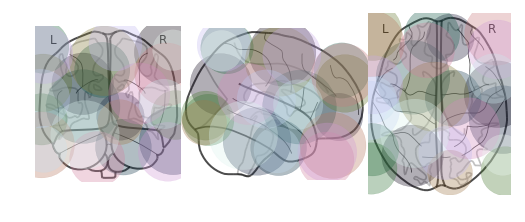

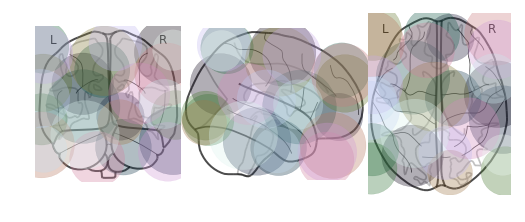

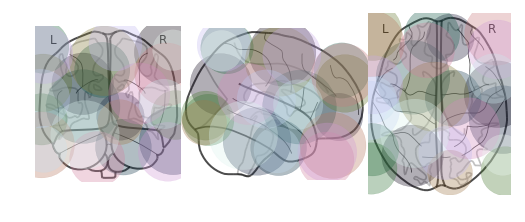

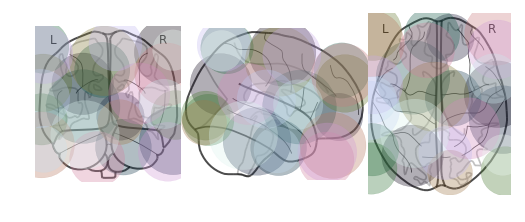

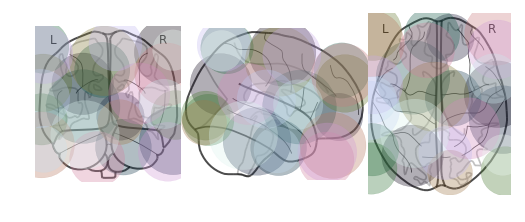

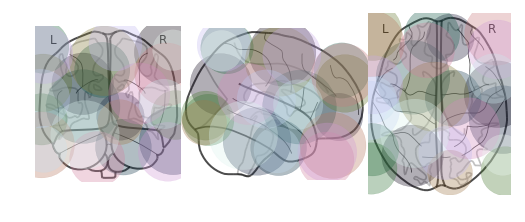

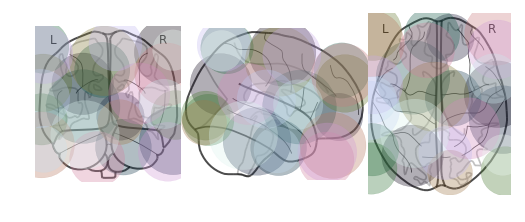

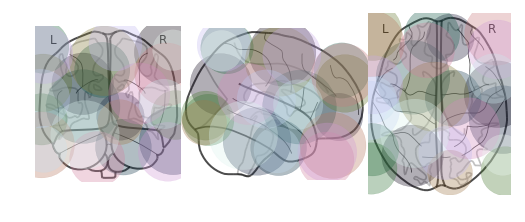

In [6]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)

In [7]:
losses = dtfa.train(num_steps=200, learning_rate=1e-1, log_level=logging.INFO, num_particles=2,
                    batch_size=128, use_cuda=True, checkpoint_steps=10, blocks_batch_size=4)

04/26/2018 13:17:55 [Epoch 1] (1213ms) Posterior free-energy 1.22391871e+15
04/26/2018 13:17:55 Saving checkpoint...
04/26/2018 13:17:56 [Epoch 2] (1028ms) Posterior free-energy 6.81992690e+14
04/26/2018 13:17:57 [Epoch 3] (1012ms) Posterior free-energy 1.84585413e+14
04/26/2018 13:17:58 [Epoch 4] (1033ms) Posterior free-energy 1.73340048e+14
04/26/2018 13:17:59 [Epoch 5] (1013ms) Posterior free-energy 2.10020344e+14
04/26/2018 13:18:00 [Epoch 6] (1062ms) Posterior free-energy 1.19383238e+14
04/26/2018 13:18:01 [Epoch 7] (1058ms) Posterior free-energy 9.32259981e+13
04/26/2018 13:18:02 [Epoch 8] (1048ms) Posterior free-energy 1.12666824e+14
04/26/2018 13:18:03 [Epoch 9] (1011ms) Posterior free-energy 1.15519999e+14
04/26/2018 13:18:04 [Epoch 10] (1007ms) Posterior free-energy 9.24535918e+13
04/26/2018 13:18:05 [Epoch 11] (1014ms) Posterior free-energy 8.84187804e+13
04/26/2018 13:18:05 Saving checkpoint...
04/26/2018 13:18:06 [Epoch 12] (1007ms) Posterior free-energy 8.97910057e+13
04/

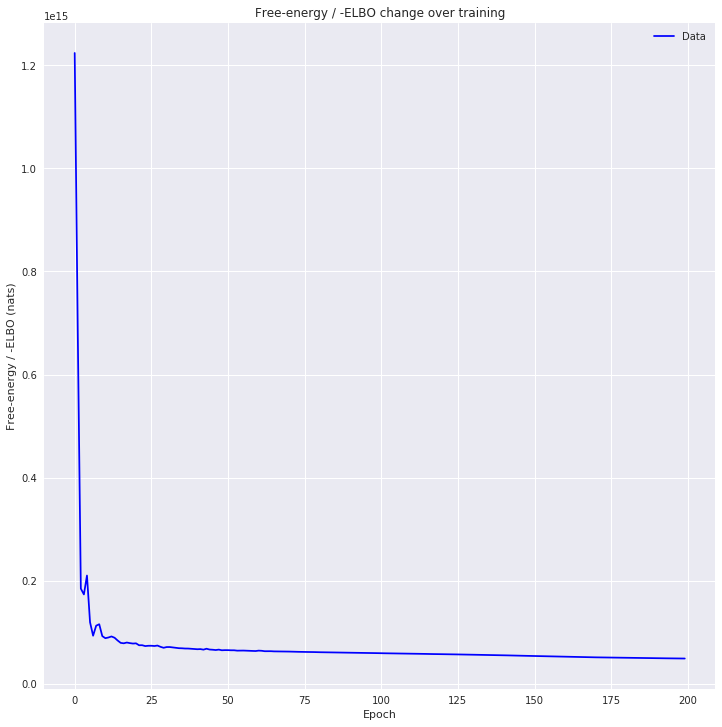

In [8]:
utils.plot_losses(losses)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


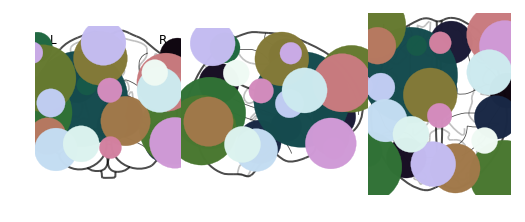

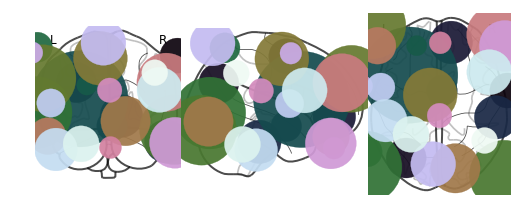

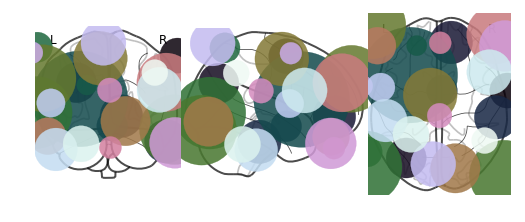

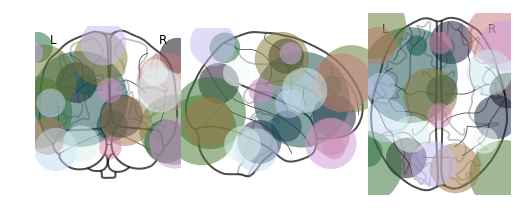

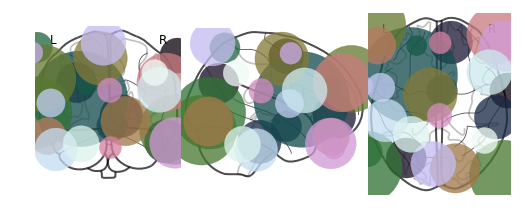

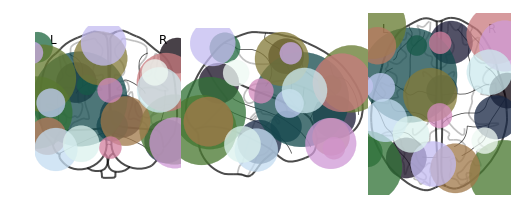

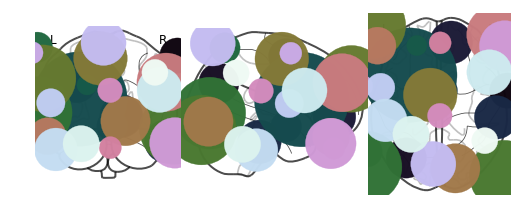

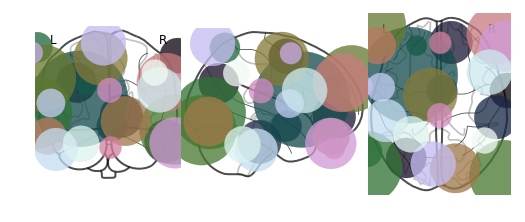

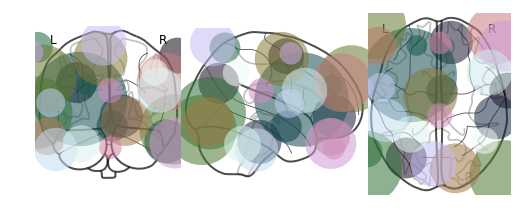

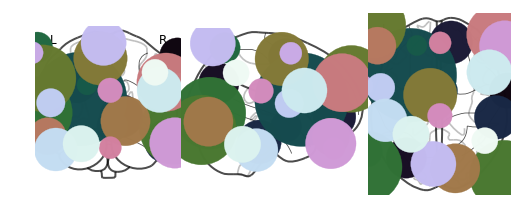

In [9]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)

In [21]:
def task_labeler(b):
    if 'heights' in b.task:
        return 'Heights'
    elif 'social' in b.task:
        return 'Social threat'
    elif 'spider' in b.task:
        return 'Spiders'
    elif 'rest' in b.task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(b):
    if b.task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


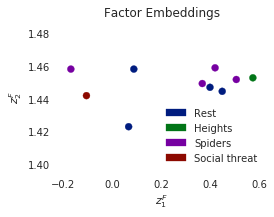

In [24]:
dtfa.scatter_factor_embedding(labeler=task_labeler)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


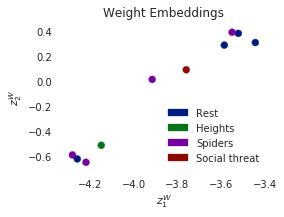

In [25]:
dtfa.scatter_weights_embedding(t=None, labeler=task_labeler)